NL Data (Step 2):         id  weight  height     sex smokes
0  NL_0001     105     188    male    yes
1  NL_0002     114     177    male    yes
2  NL_0003      70     176  female     no
3  NL_0004      68     175    male     no
4  NL_0005      86     186    male    yes
PL Data (Step 2):       id  heigth  weight     sex smokes
0  S0001   178.0    77.0  female  False
1  S0002   155.0    74.0    male  False
2  S0003   173.0    70.0    male   True
3  S0004   167.0    95.0    male  False
4  S0005   181.0    78.0  female  False
UK Data (Step 2):         id  weight  height     sex  smokes
0  UK_0001   180.8    -1.0    male       0
1  UK_0002   141.1    65.7    male       0
2  UK_0003   180.8    68.5    male       0
3  UK_0004   218.3    68.9    male       0
4  UK_0005   147.7    62.6  female       0
US Data (Step 2):       id  weight  height     sex smokes
0  S1272      61     NaN  female     no
1  S1288     105     NaN  female     no
2  S1361      92     NaN  female     no
3  S1091      78  

C:\Users\Undertaker07\AppData\Local\Temp\ipykernel_20612\3457522123.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pl_data['height_cm'].fillna(pl_data['height_cm'].mean(), inplace=True)
C:\Users\Undertaker07\AppData\Local\Temp\ipykernel_20612\3457522123.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

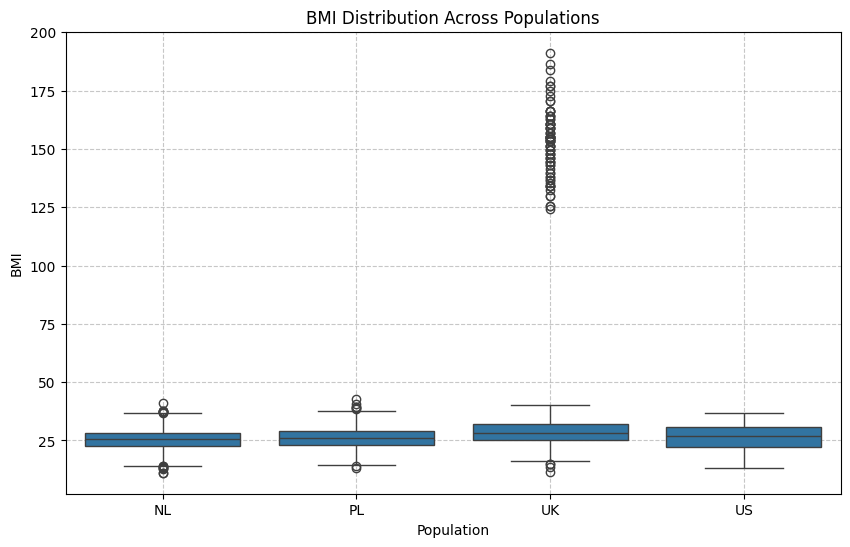


Step 8: BMI Summary Statistics by Population
             count       mean        std        min        25%        50%  \
population                                                                  
NL          1322.0  25.460201   4.353700  11.170149  22.593114  25.487171   
PL          1305.0  26.248894   4.474353  13.013087  23.147255  26.233556   
UK           694.0  42.037205  40.626331  11.657984  25.180961  28.379484   
US           137.0  26.489657   5.327534  13.126194  22.314530  26.861207   

                  75%         max  
population                         
NL          28.232503   41.099773  
PL          29.068773   42.860104  
UK          31.905592  191.257376  
US          30.642536   36.802686  

Step 9: Correlation between BMI and Gene Expression
            bmi     geneA     geneB     geneC
bmi    1.000000  0.133927  0.182025 -0.000940
geneA  0.133927  1.000000  0.564762 -0.003406
geneB  0.182025  0.564762  1.000000  0.005422
geneC -0.000940 -0.003406  0.005422  1

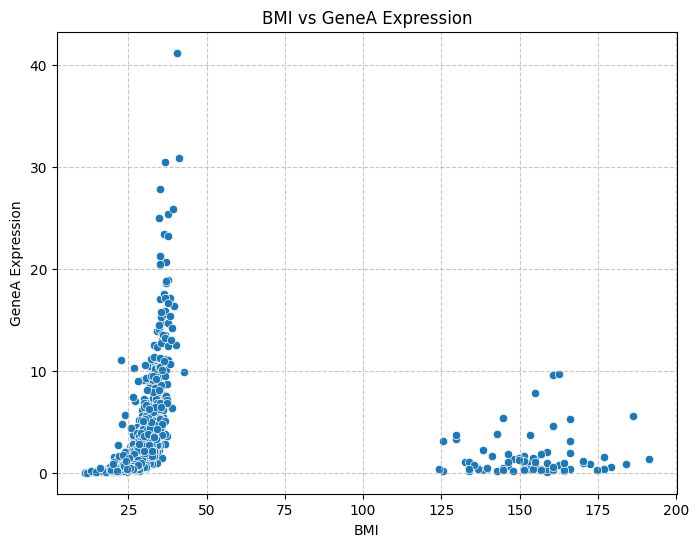


Step 10: Notebook finalized (see markdown)


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set Up Your Environment
# (Assumes directories assignment_c/data and assignment_c/out are created manually)
# Libraries installed: pandas, numpy, matplotlib, seaborn, jupyter

# Step 2: Load and Explore the Raw Data
nl_data = pd.read_csv('data/NL.csv')
pl_data = pd.read_csv('data/PL.csv')
uk_data = pd.read_csv('data/UK.csv')
us_data = pd.read_csv('data/US.csv')
gene_data = pd.read_csv('data/genes.csv')

print("NL Data (Step 2):", nl_data.head())
print("PL Data (Step 2):", pl_data.head())
print("UK Data (Step 2):", uk_data.head())
print("US Data (Step 2):", us_data.head())
print("Gene Data (Step 2):", gene_data.head())

# Step 3: Identify Inconsistencies (Added as Markdown below)
print("\nStep 3: Preliminary Inconsistencies:")
print("NL: id=NL_XXXX, weight/kg, height/cm, smokes=yes/no")
print("PL: id=SXXXX, height/cm (typo 'heigth'), weight/kg, smokes=True/False, missing values")
print("UK: id=UK_XXXX, weight/lbs, height/inches (some invalid), smokes=0")
print("US: id=SXXXX, weight/kg, height/cm (many missing), smokes=yes/no")
print("Gene: id=mixed, source, geneA/B/C")

# Step 4: Standardize Column Names
nl_data.columns = ['id', 'weight_kg', 'height_cm', 'sex', 'smokes']
pl_data.columns = ['id', 'height_cm', 'weight_kg', 'sex', 'smokes']
uk_data.columns = ['id', 'weight_kg', 'height_cm', 'sex', 'smokes']
us_data.columns = ['id', 'weight_kg', 'height_cm', 'sex', 'smokes']
gene_data.columns = ['id', 'source', 'geneA', 'geneB', 'geneC']
print("\nStep 4: Standardized column names")

# Step 5: Convert Units and Calculate BMI
uk_data['height_cm'] = uk_data['height_cm'] * 2.54  # inches to cm
uk_data['weight_kg'] = uk_data['weight_kg'] * 0.453592  # lbs to kg
uk_data.loc[uk_data['height_cm'] < 0, 'height_cm'] = pd.NA

for df in [nl_data, pl_data, uk_data, us_data]:
    df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

print("\nStep 5: Verification after unit conversion and BMI calculation")
print("NL Data:", nl_data[['id', 'height_cm', 'weight_kg', 'bmi']].head())
print("PL Data:", pl_data[['id', 'height_cm', 'weight_kg', 'bmi']].head())
print("UK Data:", uk_data[['id', 'height_cm', 'weight_kg', 'bmi']].head())
print("US Data:", us_data[['id', 'height_cm', 'weight_kg', 'bmi']].head())

# Step 6: Handle Missing Values and Duplicates
pl_data['height_cm'].fillna(pl_data['height_cm'].mean(), inplace=True)
pl_data['weight_kg'].fillna(pl_data['weight_kg'].mean(), inplace=True)
pl_data['smokes'].fillna(pl_data['smokes'].mode()[0], inplace=True)
pl_data.dropna(subset=['sex'], inplace=True)

us_data['height_cm'].fillna(us_data['height_cm'].mean(), inplace=True)
uk_data['height_cm'].fillna(uk_data['height_cm'].mean(), inplace=True)

for df in [pl_data, uk_data, us_data]:
    df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

for df in [nl_data, pl_data, uk_data, us_data]:
    df['smokes'] = df['smokes'].replace({'yes': 1, 'no': 0, True: 1, False: 0, '0': 0, 0: 0}).astype(int)

nl_data.drop_duplicates(subset=['id'], inplace=True)
pl_data.drop_duplicates(subset=['id'], inplace=True)
uk_data.drop_duplicates(subset=['id'], inplace=True)
us_data.drop_duplicates(subset=['id'], inplace=True)

print("\nStep 6: Verification after handling missing values and duplicates")
print("NL Data:", nl_data[['id', 'height_cm', 'weight_kg', 'bmi', 'smokes']].head())
print("PL Data:", pl_data[['id', 'height_cm', 'weight_kg', 'bmi', 'smokes']].head())
print("UK Data:", uk_data[['id', 'height_cm', 'weight_kg', 'bmi', 'smokes']].head())
print("US Data:", us_data[['id', 'height_cm', 'weight_kg', 'bmi', 'smokes']].head())
print("Row counts:", [len(nl_data), len(pl_data), len(uk_data), len(us_data)])

# Step 7: Merge the Datasets
nl_data['population'] = 'NL'
pl_data['population'] = 'PL'
uk_data['population'] = 'UK'
us_data['population'] = 'US'

anthro_data = pd.concat([nl_data, pl_data, uk_data, us_data], ignore_index=True)
combined_data = pd.merge(anthro_data, gene_data, on='id', how='inner')
combined_data.to_csv('out/combined_dataset.csv', index=False)

print("\nStep 7: Verification after merging datasets")
print("Combined Data:", combined_data.head())
print(f"Total rows in combined dataset: {len(combined_data)}")
print(f"Columns: {combined_data.columns.tolist()}")

# Step 8: Analyze BMI Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='population', y='bmi', data=combined_data)
plt.title('BMI Distribution Across Populations')
plt.xlabel('Population')
plt.ylabel('BMI')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nStep 8: BMI Summary Statistics by Population")
print(combined_data.groupby('population')['bmi'].describe())

# Step 9: Check BMI vs Gene Expression
correlations = combined_data[['bmi', 'geneA', 'geneB', 'geneC']].corr()
print("\nStep 9: Correlation between BMI and Gene Expression")
print(correlations)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='geneA', data=combined_data)
plt.title('BMI vs GeneA Expression')
plt.xlabel('BMI')
plt.ylabel('GeneA Expression')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Step 10: Finalize the Notebook (Markdown below)
print("\nStep 10: Notebook finalized (see markdown)")